# Extract data summary

This notebook uses the `TrialProcessor` class to extract various metrics for all trials.

This came from `fig_extract_data_summary_20230417.ipynb` in the original repo.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from pp_utils.core import DATA_PATH, RAW_PATH
from pp_utils.file_handling import df_master_loader
from pp_utils.trial_processor import TrialProcessor
from pp_utils.misc import interp_xy

import pickle

## Set paths and load master info df

### Output path

In [2]:
output_path = Path("/Volumes/SSD_2TB/MURI/fb2019_analysis_2023/data_summary")
if not output_path.exists():
    output_path.mkdir()

### Load master dataframe

In [3]:
df_master = df_master_loader(folder=DATA_PATH["main"])

## Processing params

In [4]:
from pp_utils.core import MISC_PARAMS, HYDRO_PARAMS, ENV_PARAMS, SCAN_PARAMS

In [5]:
MISC_PARAMS

{'th_RL': 140,
 'time_binning_delta': 0.05,
 'buzz_reg_switch': 0.013,
 'num_buzz_for_onset': 30,
 'dist_max': ('DTAG_dist_elliptical', 12),
 'dist_min': ('ROSTRUM_dist_to_target', 0.1)}

In [6]:
HYDRO_PARAMS

{'bkg_len_sec': 3.2e-05,
 'clk_sel_len_sec': 0.000128,
 'perc_before_pk': 30,
 'hydro_sens': -211,
 'recording_gain': 40}

In [7]:
ENV_PARAMS

{'frequency': 130000.0,
 'temperature': 16,
 'salinity': 28,
 'pressure': 1,
 'pH': 8,
 'absorption_formula_source': 'FG'}

In [8]:
SCAN_PARAMS

{'RL_tolerance': 5,
 'th_num_clk': 5,
 'true_scan_th_RL_diff': 5,
 'true_scan_max_num_click_has_RL_diff': 3}

## Extract data summary

In [9]:
SCAN_FIELDS = ("scan_ch0", "scan_ch1", "scan_combined")
TIME_FIELDS = (
    "time_decision", "time_buzz_onset_dtag", "time_buzz_onset_hydro",
    "time_touch", "time_last_nonchosen",
)
RANGE_FIELDS = (
    "range_decision_tar", "range_buzz_onset_dtag_tar", "range_buzz_onset_hydro_tar",
    "range_decision_clu", "range_buzz_onset_dtag_clu", "range_buzz_onset_hydro_clu",
)
ANGLE_FIELDS = (
    "angle_range_target", "angle_range_clutter", "angle_last_scan",
)

In [10]:
df_track_all = []
df_track_portion_all = []
time_all = []
range_all = []
scan_num_all = []
angle_all = []

In [11]:
trial_idx = 2
tp = TrialProcessor(df_master, trial_idx, data_path=DATA_PATH, raw_path=RAW_PATH)


------ trial 2 ------------
20190625_s1_t1
* cal object selected: hula_flip
* track file:     20190625_s1_t1_GOPR1466_xypressure_hula_flip_transformed.csv
* dtag file:      20190625_s1_t1_dtag.csv
* hydro ch0 file: 20190625_s1_t1_hydro_ch0.csv
* hydro ch1 file: 20190625_s1_t1_hydro_ch1.csv
* scenario: TC1
* choice: 1


In [12]:
# Add track and hydrophone features
tp.add_track_features()
tp.add_hydro_features()
tp.add_SNR_p2p(hydro_params=HYDRO_PARAMS)
tp.add_RL_ASL_pointEL(hydro_params=HYDRO_PARAMS, env_params=ENV_PARAMS)
tp.add_before_touch_to_all_dfs()

In [13]:
tp.df_track

,LEFT_EYE_X,LEFT_EYE_Y,RIGHT_EYE_X,RIGHT_EYE_Y,ROSTRUM_X,ROSTRUM_Y,BACK_X,BACK_Y,DTAG_X,DTAG_Y,...,DTAG_dist_elliptical,DTAG_speed,ROSTRUM_dist_to_target,ROSTRUM_dist_to_clutter,ROSTRUM_dist_elliptical,ROSTRUM_speed,angle_heading_to_target,angle_heading_to_clutter,absolute_heading,before_touch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [14]:
import matplotlib.pyplot as plt

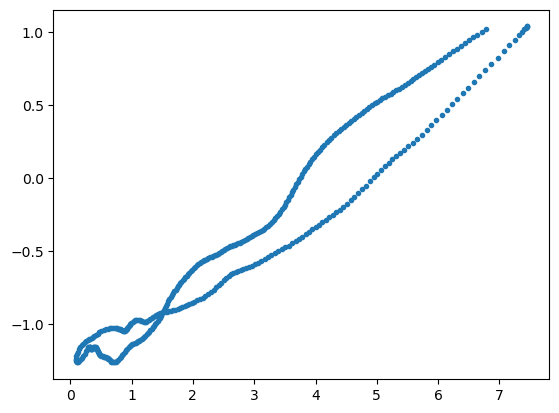

In [15]:
plt.plot(tp.df_track["DTAG_X"], tp.df_track["DTAG_Y"], ".")

In [16]:
track_portion_entry = tp.get_desired_track_portion(
    dist_max=MISC_PARAMS["dist_max"], dist_min=MISC_PARAMS["dist_min"]
)

In [17]:
track_portion_entry

,LEFT_EYE_X,LEFT_EYE_Y,RIGHT_EYE_X,RIGHT_EYE_Y,ROSTRUM_X,ROSTRUM_Y,BACK_X,BACK_Y,DTAG_X,DTAG_Y,...,DTAG_dist_elliptical,DTAG_speed,ROSTRUM_dist_to_target,ROSTRUM_dist_to_clutter,ROSTRUM_dist_elliptical,ROSTRUM_speed,angle_heading_to_target,angle_heading_to_clutter,absolute_heading,before_touch
40,5.543810,0.682832,5.673355,0.519322,5.428537,0.507548,6.061533,0.799968,5.837577,0.746512,...,11.996545,1.584908,5.651003,5.452212,11.103215,1.540140,-13.076706,-23.006310,-0.528726,True
41,5.496251,0.674305,5.618779,0.506914,5.377022,0.503831,6.006545,0.782671,5.788285,0.731880,...,11.894385,1.541018,5.600493,5.400575,11.001067,1.547935,-11.785874,-21.802411,-0.506298,True
42,5.448910,0.667058,5.564514,0.495371,5.326041,0.501723,5.952313,0.765573,5.739581,0.717869,...,11.793645,1.518857,5.550970,5.349620,10.900591,1.529198,-10.362060,-20.465663,-0.481620,True
43,5.402653,0.661040,5.510428,0.484488,5.275677,0.500814,5.899619,0.749003,5.691733,0.704285,...,11.694763,1.490664,5.502407,5.299394,10.801801,1.509667,-8.816512,-19.006995,-0.454847,True
44,5.356734,0.655723,5.456460,0.473983,5.225871,0.500498,5.847692,0.732812,5.643907,0.691125,...,11.596109,1.486639,5.454581,5.249783,10.704365,1.492701,-7.253374,-17.531884,-0.427837,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.342890,-1.039900,0.309285,-1.232031,0.141943,-1.109221,0.628110,-1.228973,0.471204,-1.200731,...,1.780961,0.355279,0.149458,1.118266,1.267724,0.373412,-0.825815,-53.041430,0.271085,True
246,0.333050,-1.035269,0.298043,-1.230666,0.130432,-1.106453,0.617275,-1.224253,0.462114,-1.194542,...,1.761442,0.329559,0.137663,1.114115,1.251778,0.354798,-1.081661,-53.977371,0.259591,True
247,0.323880,-1.030445,0.286820,-1.228754,0.118931,-1.103772,0.607458,-1.218999,0.454196,-1.187898,...,1.742978,0.309768,0.125913,1.110161,1.236074,0.353942,-1.356915,-54.989418,0.245848,True
248,0.315105,-1.025859,0.275745,-1.226159,0.108013,-1.100807,0.598665,-1.213823,0.447140,-1.181260,...,1.725717,0.290364,0.114630,1.106094,1.220724,0.339059,-1.537474,-55.921195,0.232927,True


In [18]:
tp.trial_series["TARGET_ANGLE"]

'TC1'

In [19]:
if tp.trial_series["TARGET_ANGLE"][:2] == "TC":
    pos_tar, pos_clu = [0, -1], [0, 0]
else:
    pos_tar, pos_clu = [0, 0], [0, -1]

In [20]:
pos_tar, pos_clu

([0, -1], [0, 0])

In [21]:
# Scan
tp.get_hydro_scan_num(th_RL=MISC_PARAMS["th_RL"], scan_params=SCAN_PARAMS)
df_scan_ch0 = tp.sort_df_scan_to_channel(ch=0)
df_scan_ch1 = tp.sort_df_scan_to_channel(ch=1)

# Decision
decision_click = tp.decision_hydro_click_from_scan()

# Buzz onset
buzz_onset_dtag = tp.get_dtag_buzz_onset(
    buzz_reg_switch=MISC_PARAMS["buzz_reg_switch"],
    num_buzz_for_onset=MISC_PARAMS["num_buzz_for_onset"]
)
buzz_onset_hydro = tp.get_hydro_buzz_onset(
    buzz_reg_switch=MISC_PARAMS["buzz_reg_switch"],
    num_buzz_for_onset=MISC_PARAMS["num_buzz_for_onset"]
)

# Positions
decision_pos = interp_xy(decision_click["time_corrected"], tp.df_track)
buzz_onset_dtag_pos = interp_xy(buzz_onset_dtag["time_corrected"], tp.df_track)
buzz_onset_hydro_pos = interp_xy(buzz_onset_hydro["time_corrected"], tp.df_track)

# Inspection angle
angle_ch0_in_cam, angle_ch1_in_cam = tp.get_inspection_angle_in_view(
    time_stop=decision_click["time_corrected"],
    th_RL=MISC_PARAMS["th_RL"],
    time_binning_delta=MISC_PARAMS["time_binning_delta"]
)

# Last scan start/end time
tp.get_timing_last_scan_of_nonselect()

In [22]:
(decision_click["time_corrected"],
buzz_onset_dtag["time_corrected"],
buzz_onset_hydro["time_corrected"])

(530.5506482453703, 531.2635873842592, 531.2662302453704)

In [23]:
decision_pos, buzz_onset_dtag_pos, buzz_onset_hydro_pos

(array([ 1.07663283, -1.12218383]),
 array([ 0.67259231, -1.25381095]),
 array([ 0.67150933, -1.25345136]))

In [24]:
tp.df_track.to_csv("/Users/wujung/Downloads/new_df_track.csv")

In [25]:
# Loop through all trials
for trial_idx in df_master.index:

    # Init entry
    time_dict = dict.fromkeys(TIME_FIELDS)
    range_dict = dict.fromkeys(RANGE_FIELDS)
    angle_dict = dict.fromkeys(ANGLE_FIELDS)
    scan_dict = dict.fromkeys(SCAN_FIELDS)
    track_all_entry = None
    track_portion_entry = None
    
    # Process trial
    tp = TrialProcessor(df_master, trial_idx, data_path=DATA_PATH, raw_path=RAW_PATH)
    
    if tp.trial_usable is True:
        
        # Add track and hydrophone features
        tp.add_track_features()
        tp.add_hydro_features()
        tp.add_SNR_p2p(hydro_params=HYDRO_PARAMS)
        tp.add_RL_ASL_pointEL(hydro_params=HYDRO_PARAMS, env_params=ENV_PARAMS)
        tp.add_before_touch_to_all_dfs()

        # Scan
        tp.get_hydro_scan_num(th_RL=MISC_PARAMS["th_RL"], scan_params=SCAN_PARAMS)
        df_scan_ch0 = tp.sort_df_scan_to_channel(ch=0)
        df_scan_ch1 = tp.sort_df_scan_to_channel(ch=1)

        # Decision
        decision_click = tp.decision_hydro_click_from_scan()

        # Buzz onset
        buzz_onset_dtag = tp.get_dtag_buzz_onset(
            buzz_reg_switch=MISC_PARAMS["buzz_reg_switch"],
            num_buzz_for_onset=MISC_PARAMS["num_buzz_for_onset"]
        )
        buzz_onset_hydro = tp.get_hydro_buzz_onset(
            buzz_reg_switch=MISC_PARAMS["buzz_reg_switch"],
            num_buzz_for_onset=MISC_PARAMS["num_buzz_for_onset"]
        )

        # Positions
        decision_pos = interp_xy(decision_click["time_corrected"], tp.df_track)
        buzz_onset_dtag_pos = interp_xy(buzz_onset_dtag["time_corrected"], tp.df_track)
        buzz_onset_hydro_pos = interp_xy(buzz_onset_hydro["time_corrected"], tp.df_track)
        
        # Inspection angle
        angle_ch0_in_cam, angle_ch1_in_cam = tp.get_inspection_angle_in_view(
            time_stop=decision_click["time_corrected"],
            th_RL=MISC_PARAMS["th_RL"],
            time_binning_delta=MISC_PARAMS["time_binning_delta"]
        )
        
        # Last scan start/end time
        tp.get_timing_last_scan_of_nonselect()

    
        # Collect info for each trial -------------------------------

        track_all_entry = tp.df_track
        track_portion_entry = tp.get_desired_track_portion(
            dist_max=MISC_PARAMS["dist_max"], dist_min=MISC_PARAMS["dist_min"]
        )
        
        scan_dict.update({
            "scan_ch0": len(df_scan_ch0),      # scan toward ch0
            "scan_ch1": len(df_scan_ch1),      # scan toward ch1
            "scan_combined": len(tp.df_scan),  # all scans across 2 ch
        })

        time_dict.update({
            "time_decision": decision_click["time_corrected"],  # decision time
            "time_buzz_onset_dtag": buzz_onset_dtag["time_corrected"],  # buzz onset identified in dtag
            "time_buzz_onset_hydro": buzz_onset_hydro["time_corrected"],  # buzz onset identified in hydro
            "time_touch": tp.df_dtag[tp.df_dtag["before_touch"]].iloc[-1]["time_corrected"],  # touch time
            "time_last_nonchosen": tp.duration_last_scan_of_nonselect(),  # last scan duration
        })

        if tp.trial_series["TARGET_ANGLE"][:2] == "TC":
            pos_tar, pos_clu = [0, -1], [0, 0]
        else:
            pos_tar, pos_clu = [0, 0], [0, -1]
        range_dict.update({
            "range_decision_tar": np.linalg.norm(decision_pos - pos_tar),
            "range_buzz_onset_dtag_tar": np.linalg.norm(buzz_onset_dtag_pos - pos_tar),
            "range_buzz_onset_hydro_tar": np.linalg.norm(buzz_onset_hydro_pos - pos_tar),
            "range_decision_clu": np.linalg.norm(decision_pos - pos_clu),
            "range_buzz_onset_dtag_clu": np.linalg.norm(buzz_onset_dtag_pos - pos_clu),
            "range_buzz_onset_hydro_clu": np.linalg.norm(buzz_onset_hydro_pos - pos_clu),
        })
        
        angle_dict.update({
            "angle_range_target": (
                None if angle_ch0_in_cam.size == 0 else angle_ch0_in_cam.max() - angle_ch0_in_cam.min() 
            ),
            "angle_range_clutter": (
                None if angle_ch1_in_cam.size == 0 else angle_ch1_in_cam.max() - angle_ch1_in_cam.min() 
            ),
            "angle_last_scan": tp.angle_span_last_scan_of_nonselect(),
        })
        
    # Append to list
    df_track_all.append(track_all_entry)
    df_track_portion_all.append(track_portion_entry)
    scan_num_all.append(list(scan_dict.values()))
    time_all.append(list(time_dict.values()))
    range_all.append(list(range_dict.values()))
    angle_all.append(list(angle_dict.values()))


------ trial 0 ------------
20190625_s1_t0
Clicks not synced!
No track file!
No target file!
Some data missing in this trial, skipping...

------ trial 1 ------------
20190625_s1_t0
Clicks not synced!
No track file!
No target file!
Some data missing in this trial, skipping...

------ trial 2 ------------
20190625_s1_t1
* cal object selected: hula_flip
* track file:     20190625_s1_t1_GOPR1466_xypressure_hula_flip_transformed.csv
* dtag file:      20190625_s1_t1_dtag.csv
* hydro ch0 file: 20190625_s1_t1_hydro_ch0.csv
* hydro ch1 file: 20190625_s1_t1_hydro_ch1.csv
* scenario: TC1
* choice: 1

------ trial 3 ------------
20190625_s1_t2
* cal object selected: hula_flip
* track file:     20190625_s1_t2_GOPR1466_xypressure_hula_flip_transformed.csv
* dtag file:      20190625_s1_t2_dtag.csv
* hydro ch0 file: 20190625_s1_t2_hydro_ch0.csv
* hydro ch1 file: 20190625_s1_t2_hydro_ch1.csv
* scenario: CT1
* choice: 1

------ trial 4 ------------
20190625_s1_t3
* cal object selected: hula_flip
* tra


------ trial 34 ------------
20190626_s1_t9
* cal object selected: hula_flip
* track file:     20190626_s1_t9_GOPR1469_xypressure_hula_flip_transformed.csv
* dtag file:      20190626_s1_t9_dtag.csv
* hydro ch0 file: 20190626_s1_t9_hydro_ch0.csv
* hydro ch1 file: 20190626_s1_t9_hydro_ch1.csv
* scenario: CT1
* choice: 1

------ trial 35 ------------
20190626_s1_t10
* cal object selected: hula_flip
* track file:     20190626_s1_t10_GOPR1469_xypressure_hula_flip_transformed.csv
* dtag file:      20190626_s1_t10_dtag.csv
* hydro ch0 file: 20190626_s1_t10_hydro_ch0.csv
* hydro ch1 file: 20190626_s1_t10_hydro_ch1.csv
* scenario: TC2
* choice: 1

------ trial 36 ------------
20190626_s2_t1
* cal object selected: hula_noflip
* track file:     20190626_s2_t1_GOPR1470_xypressure_hula_noflip_transformed.csv
* dtag file:      20190626_s2_t1_dtag.csv
* hydro ch0 file: 20190626_s2_t1_hydro_ch0.csv
* hydro ch1 file: 20190626_s2_t1_hydro_ch1.csv
* scenario: CT1
* choice: 1

------ trial 37 -----------


------ trial 61 ------------
20190627_s1_t6
* cal object selected: hula_flip
* track file:     20190627_s1_t6_GOPR1472_xypressure_hula_flip_transformed.csv
* dtag file:      20190627_s1_t6_dtag.csv
* hydro ch0 file: 20190627_s1_t6_hydro_ch0.csv
* hydro ch1 file: 20190627_s1_t6_hydro_ch1.csv
* scenario: TC1
* choice: 1

------ trial 62 ------------
20190627_s1_t7
* cal object selected: hula_flip
* track file:     20190627_s1_t7_GOPR1472_xypressure_hula_flip_transformed.csv
* dtag file:      20190627_s1_t7_dtag.csv
* hydro ch0 file: 20190627_s1_t7_hydro_ch0.csv
* hydro ch1 file: 20190627_s1_t7_hydro_ch1.csv
* scenario: TC3
* choice: 1

------ trial 63 ------------
20190627_s1_t8
* cal object selected: hula_flip
* track file:     20190627_s1_t8_GOPR1472_xypressure_hula_flip_transformed.csv
* dtag file:      20190627_s1_t8_dtag.csv
* hydro ch0 file: 20190627_s1_t8_hydro_ch0.csv
* hydro ch1 file: 20190627_s1_t8_hydro_ch1.csv
* scenario: CT1
* choice: 1

------ trial 64 ------------
2019062


------ trial 93 ------------
20190628_s1_t5
* cal object selected: hula_flip
* track file:     20190628_s1_t5_GOPR1475_xypressure_hula_flip_transformed.csv
* dtag file:      20190628_s1_t5_dtag.csv
* hydro ch0 file: 20190628_s1_t5_hydro_ch0.csv
* hydro ch1 file: 20190628_s1_t5_hydro_ch1.csv
* scenario: TC2
* choice: 1

------ trial 94 ------------
20190628_s1_t6
* cal object selected: hula_flip
* track file:     20190628_s1_t6_GP011475_xypressure_hula_flip_transformed.csv
* dtag file:      20190628_s1_t6_dtag.csv
* hydro ch0 file: 20190628_s1_t6_hydro_ch0.csv
* hydro ch1 file: 20190628_s1_t6_hydro_ch1.csv
* scenario: CT2
* choice: 1

------ trial 95 ------------
20190628_s1_t7
* cal object selected: hula_flip
* track file:     20190628_s1_t7_GP011475_xypressure_hula_flip_transformed.csv
* dtag file:      20190628_s1_t7_dtag.csv
* hydro ch0 file: 20190628_s1_t7_hydro_ch0.csv
* hydro ch1 file: 20190628_s1_t7_hydro_ch1.csv
* scenario: CT3
* choice: 0

------ trial 96 ------------
2019062


------ trial 119 ------------
20190628_s3_t9
* cal object selected: hula_noflip
* track file:     20190628_s3_t9_GOPR1477_xypressure_hula_noflip_transformed.csv
* dtag file:      20190628_s3_t9_dtag.csv
* hydro ch0 file: 20190628_s3_t9_hydro_ch0.csv
* hydro ch1 file: 20190628_s3_t9_hydro_ch1.csv
* scenario: CT1
* choice: 1

------ trial 120 ------------
20190628_s3_t10
* cal object selected: hula_noflip
* track file:     20190628_s3_t10_GOPR1477_xypressure_hula_noflip_transformed.csv
* dtag file:      20190628_s3_t10_dtag.csv
* hydro ch0 file: 20190628_s3_t10_hydro_ch0.csv
* hydro ch1 file: 20190628_s3_t10_hydro_ch1.csv
* scenario: TC2
* choice: 1

------ trial 121 ------------
20190701_s1_t1
* cal object selected: hula_noflip
* track file:     20190701_s1_t1_GOPR1478_xypressure_hula_noflip_transformed.csv
* dtag file:      20190701_s1_t1_dtag.csv
* hydro ch0 file: 20190701_s1_t1_hydro_ch0.csv
* hydro ch1 file: 20190701_s1_t1_hydro_ch1.csv
* scenario: CT3
* choice: 1

------ trial 122


------ trial 153 ------------
20190702_s1_t2
* cal object selected: cross
* track file:     20190702_s1_t2_GOPR1481_xypressure_cross_transformed.csv
* dtag file:      20190702_s1_t2_dtag.csv
* hydro ch0 file: 20190702_s1_t2_hydro_ch0.csv
* hydro ch1 file: 20190702_s1_t2_hydro_ch1.csv
* scenario: CT4
* choice: 1

------ trial 154 ------------
20190702_s1_t3
* cal object selected: cross
* track file:     20190702_s1_t3_GOPR1481_xypressure_cross_transformed.csv
* dtag file:      20190702_s1_t3_dtag.csv
* hydro ch0 file: 20190702_s1_t3_hydro_ch0.csv
* hydro ch1 file: 20190702_s1_t3_hydro_ch1.csv
* scenario: CT3
* choice: 1

------ trial 155 ------------
20190702_s1_t4
* cal object selected: cross
* track file:     20190702_s1_t4_GOPR1481_xypressure_cross_transformed.csv
* dtag file:      20190702_s1_t4_dtag.csv
* hydro ch0 file: 20190702_s1_t4_hydro_ch0.csv
* hydro ch1 file: 20190702_s1_t4_hydro_ch1.csv
* scenario: TC1
* choice: 1

------ trial 156 ------------
20190702_s1_t5
Clicks not s


------ trial 187 ------------
20190703_s1_t5
* cal object selected: cross
* track file:     20190703_s1_t5_GOPR1484_xypressure_cross_transformed.csv
* dtag file:      20190703_s1_t5_dtag.csv
* hydro ch0 file: 20190703_s1_t5_hydro_ch0.csv
* hydro ch1 file: 20190703_s1_t5_hydro_ch1.csv
* scenario: CT3
* choice: 1

------ trial 188 ------------
20190703_s1_t6
* cal object selected: cross
* track file:     20190703_s1_t6_GOPR1484_xypressure_cross_transformed.csv
* dtag file:      20190703_s1_t6_dtag.csv
* hydro ch0 file: 20190703_s1_t6_hydro_ch0.csv
* hydro ch1 file: 20190703_s1_t6_hydro_ch1.csv
* scenario: TC4
* choice: 1

------ trial 189 ------------
20190703_s1_t7
* cal object selected: cross
* track file:     20190703_s1_t7_GOPR1484_xypressure_cross_transformed.csv
* dtag file:      20190703_s1_t7_dtag.csv
* hydro ch0 file: 20190703_s1_t7_hydro_ch0.csv
* hydro ch1 file: 20190703_s1_t7_hydro_ch1.csv
* scenario: TC3
* choice: 1

------ trial 190 ------------
20190703_s1_t8
* cal object


------ trial 215 ------------
20190704_s1_t2
* cal object selected: cross
* track file:     20190704_s1_t2_GOPR1487_xypressure_cross_transformed.csv
* dtag file:      20190704_s1_t2_dtag.csv
* hydro ch0 file: 20190704_s1_t2_hydro_ch0.csv
* hydro ch1 file: 20190704_s1_t2_hydro_ch1.csv
* scenario: TC2
* choice: 1

------ trial 216 ------------
20190704_s1_t3
* cal object selected: cross
* track file:     20190704_s1_t3_GOPR1487_xypressure_cross_transformed.csv
* dtag file:      20190704_s1_t3_dtag.csv
* hydro ch0 file: 20190704_s1_t3_hydro_ch0.csv
* hydro ch1 file: 20190704_s1_t3_hydro_ch1.csv
* scenario: TC1
* choice: 1

------ trial 217 ------------
20190704_s1_t4
* cal object selected: cross
* track file:     20190704_s1_t4_GOPR1487_xypressure_cross_transformed.csv
* dtag file:      20190704_s1_t4_dtag.csv
* hydro ch0 file: 20190704_s1_t4_hydro_ch0.csv
* hydro ch1 file: 20190704_s1_t4_hydro_ch1.csv
* scenario: CT2
* choice: 1

------ trial 218 ------------
20190704_s1_t5
* cal object


------ trial 242 ------------
20190704_s3_t8
* cal object selected: cross
* track file:     20190704_s3_t8_GOPR1489_xypressure_cross_transformed.csv
* dtag file:      20190704_s3_t8_dtag.csv
* hydro ch0 file: 20190704_s3_t8_hydro_ch0.csv
* hydro ch1 file: 20190704_s3_t8_hydro_ch1.csv
* scenario: TC1
* choice: 1

------ trial 243 ------------
20190704_s3_t9
* cal object selected: cross
* track file:     20190704_s3_t9_GOPR1489_xypressure_cross_transformed.csv
* dtag file:      20190704_s3_t9_dtag.csv
* hydro ch0 file: 20190704_s3_t9_hydro_ch0.csv
* hydro ch1 file: 20190704_s3_t9_hydro_ch1.csv
* scenario: CT3
* choice: 1

------ trial 244 ------------
20190704_s3_t10
* cal object selected: cross
* track file:     20190704_s3_t10_GOPR1489_xypressure_cross_transformed.csv
* dtag file:      20190704_s3_t10_dtag.csv
* hydro ch0 file: 20190704_s3_t10_hydro_ch0.csv
* hydro ch1 file: 20190704_s3_t10_hydro_ch1.csv
* scenario: TC3
* choice: 0

------ trial 245 ------------
20190704_s3_t11
* cal 

## Organize dataframe

In [26]:
df_scan_all = pd.DataFrame(scan_num_all, columns=SCAN_FIELDS)
df_time_all = pd.DataFrame(time_all, columns=TIME_FIELDS)
df_range_all = pd.DataFrame(range_all, columns=RANGE_FIELDS)
df_angle_all = pd.DataFrame(angle_all, columns=ANGLE_FIELDS)

In [27]:
df_merge_all = pd.concat((df_scan_all, df_time_all, df_range_all, df_angle_all), axis=1)

In [28]:
df_merge_all[["SPHEROID", "CHOICE", "TARGET_ANGLE", "fname_prefix"]] = df_master[
    ["SPHEROID", "CHOICE", "TARGET_ANGLE", "fname_prefix"]
]

In [29]:
df_merge_all

,scan_ch0,scan_ch1,scan_combined,time_decision,time_buzz_onset_dtag,time_buzz_onset_hydro,time_touch,time_last_nonchosen,range_decision_tar,range_buzz_onset_dtag_tar,...,range_decision_clu,range_buzz_onset_dtag_clu,range_buzz_onset_hydro_clu,angle_range_target,angle_range_clutter,angle_last_scan,SPHEROID,CHOICE,TARGET_ANGLE,fname_prefix
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,X,-1,TX1,20190625_s1_t0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,X,-1,TX1,20190625_s1_t0
2,7.0,7.0,13.0,530.550648,531.263587,531.266230,532.564810,0.268760,1.083544,0.718888,...,1.555132,1.422822,1.421993,17.458140,54.204238,5.168805,L,1,TC1,20190625_s1_t1
3,5.0,5.0,9.0,676.986342,677.812622,677.813616,679.845126,0.304592,1.252419,0.793524,...,1.352446,0.930691,0.930646,16.727133,7.348420,1.777283,L,1,CT1,20190625_s1_t2
4,7.0,6.0,11.0,764.885338,766.960336,766.961776,768.832284,0.366148,2.510579,0.984719,...,2.441380,1.450829,1.450659,5.177008,11.058150,1.648957,L,1,TC1,20190625_s1_t3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,6.0,5.0,9.0,771.450836,772.415519,772.453444,774.404724,0.423488,1.811494,1.017214,...,1.461558,1.142615,1.141121,22.621670,8.123448,7.569817,M,1,TC1,20190704_s3_t8
243,7.0,6.0,10.0,830.557031,830.896123,830.894679,832.663858,0.356172,1.222779,0.956701,...,1.062928,0.852896,0.853144,26.562826,3.005599,0.876847,M,1,CT3,20190704_s3_t9
244,4.0,4.0,7.0,884.984590,885.468077,885.475970,887.818785,1.071250,1.145556,1.003286,...,1.379984,1.042868,1.039515,6.361237,16.815334,1.342138,M,0,TC3,20190704_s3_t10
245,4.0,4.0,7.0,932.993872,934.163839,934.192478,937.301557,0.572210,2.020452,1.198936,...,1.929837,1.033472,1.008076,13.854835,5.841551,4.376336,M,0,TC3,20190704_s3_t11


### Select which buzz to use

In [30]:
def clean_buzz(x, clean_type):
    # For trials in 20190618_s1, use hydro buzz onset
    if x.name >=89 and x.name <=98:
        if clean_type == "time":
            return x["time_buzz_onset_hydro"]
        elif clean_type == "range_target":
            return x["range_buzz_onset_hydro_tar"]
        elif clean_type == "range_clutter":
            return x["range_buzz_onset_hydro_clu"]
        else:
            raise ValueError("Provided type is not supported!")
    
    # For all other trials: use whichever earlier
    if x["time_buzz_onset_hydro"] < x["time_buzz_onset_dtag"]:
        if clean_type == "time":
            return x["time_buzz_onset_hydro"]
        elif clean_type == "range_target":
            return x["range_buzz_onset_hydro_tar"]
        elif clean_type == "range_clutter":
            return x["range_buzz_onset_hydro_clu"]
        else:
            raise ValueError("Provided type is not supported!")
    else:
        if clean_type == "time":
            return x["time_buzz_onset_dtag"]
        elif clean_type == "range_target":
            return x["range_buzz_onset_dtag_tar"]
        elif clean_type == "range_clutter":
            return x["range_buzz_onset_dtag_clu"]
        else:
            raise ValueError("Provided type is not supported!")


In [31]:
df_merge_all["time_buzz_onset_clean"] = df_merge_all.apply(clean_buzz, clean_type="time", axis=1)

In [32]:
df_merge_all["time_decision2touch"] = df_merge_all["time_touch"] - df_merge_all["time_decision"]
df_merge_all["time_buzz2touch"] = df_merge_all["time_touch"] - df_merge_all["time_buzz_onset_clean"]

In [33]:
df_merge_all["range_buzz_onset_tar_clean"] = df_merge_all.apply(clean_buzz, clean_type="range_target", axis=1)
df_merge_all["range_buzz_onset_clu_clean"] = df_merge_all.apply(clean_buzz, clean_type="range_clutter", axis=1)

In [34]:
def clean_range_buzz_onset(x):
    if x["time_decision2touch"] < x["time_buzz2touch"]:
        # Decision AFTER buzz onset (buzzing at clutter first)
        return x["range_buzz_onset_clu_clean"]
    else:
        # Decision BEFORE buzz onset (buzzing at the target)
        return x["range_buzz_onset_tar_clean"]

In [35]:
df_merge_all["range_buzz_onset_closest"] = df_merge_all.apply(
    clean_range_buzz_onset, axis=1
)

### Export to CSV

In [36]:
# summary
df_merge_all.to_csv(output_path / "data_summary_all_20230426.csv")

# full tracks
with open(output_path / "track_all.pickle", "wb") as fileout:
    pickle.dump(df_track_all, fileout)

# track portions used for clustering
with open(output_path / "track_portion_all.pickle", "wb") as fileout:
    pickle.dump(df_track_portion_all, fileout)